## Import Libraries and Load Data:-


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

## EDA

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

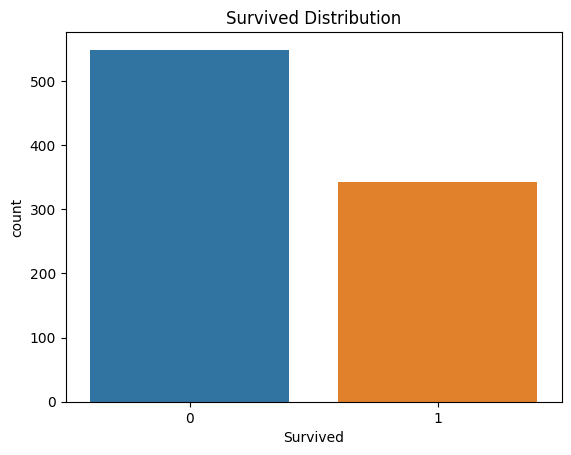

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title('Survived Distribution')
plt.show()

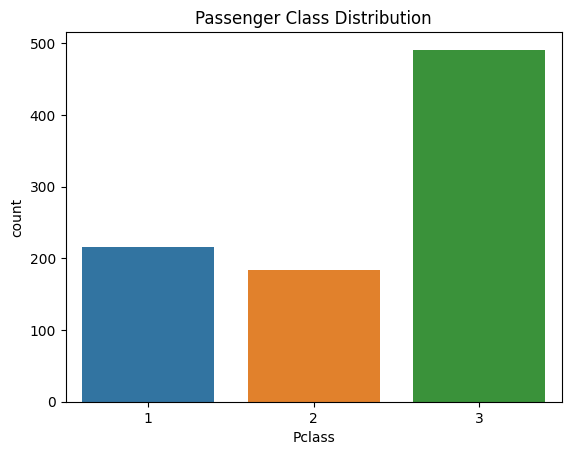

In [ ]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

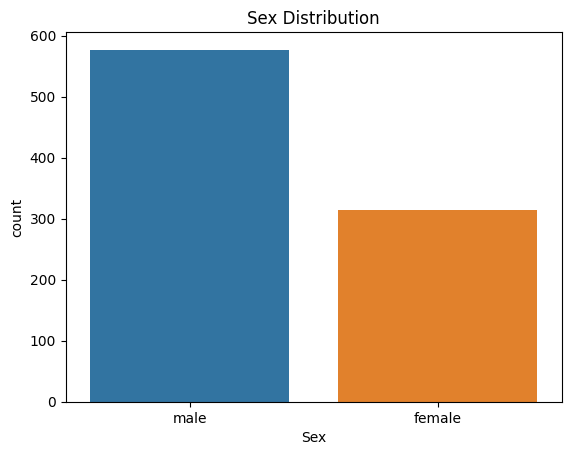

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()

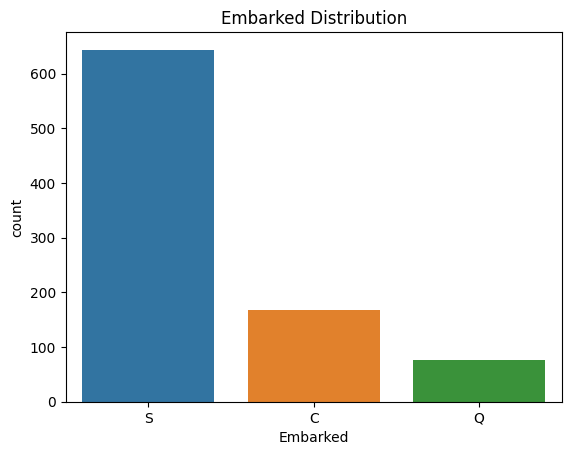

In [ ]:
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.show()

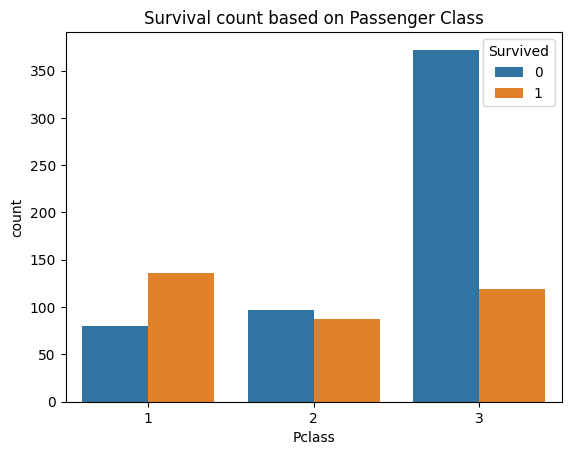

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival count based on Passenger Class')
plt.show()

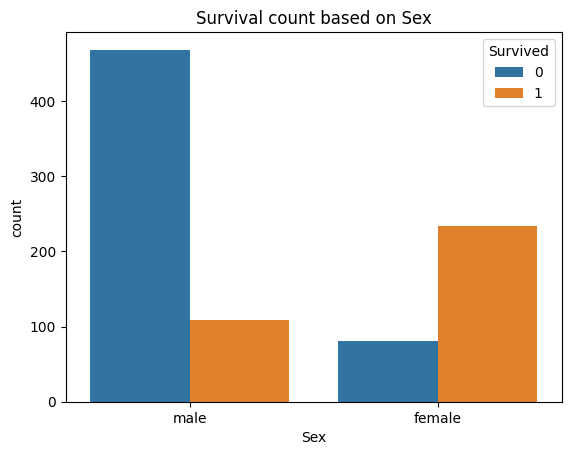

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival count based on Sex')
plt.show()

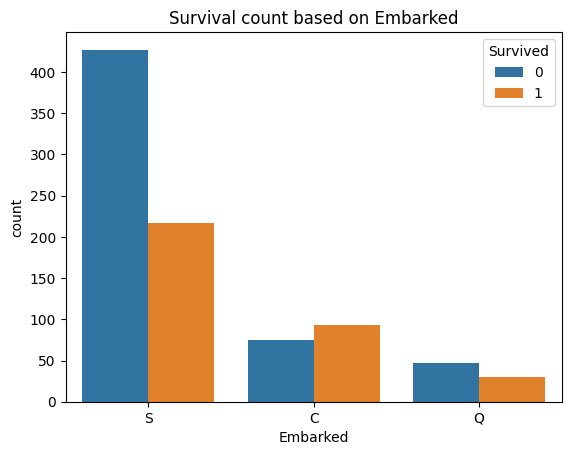

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival count based on Embarked')
plt.show()

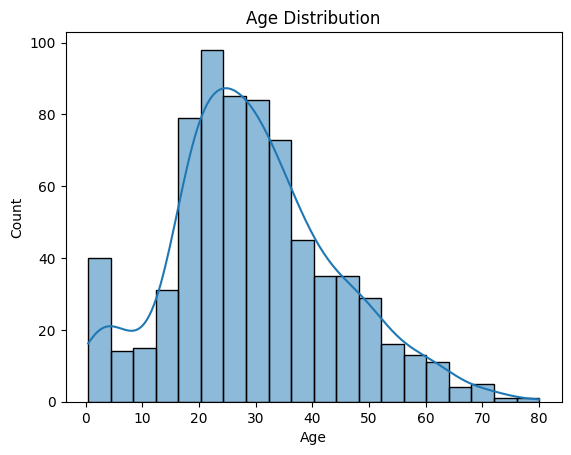

In [ ]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

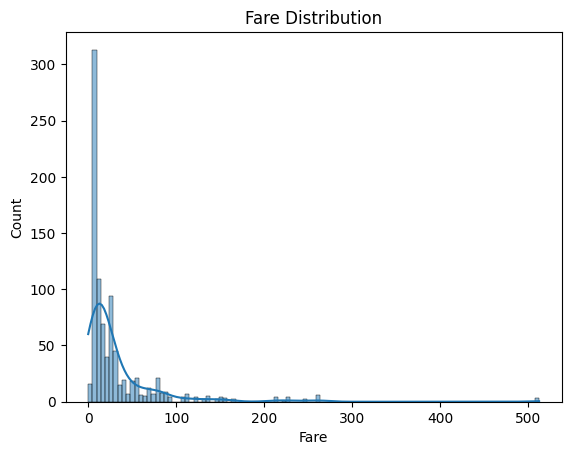

In [ ]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

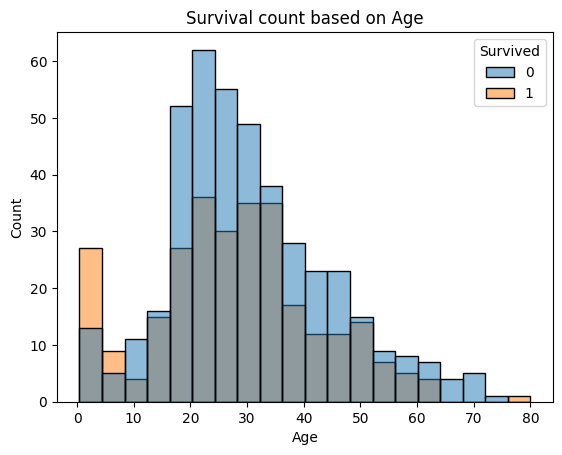

In [ ]:
sns.histplot(x='Age', hue='Survived', data=df)
plt.title('Survival count based on Age')
plt.show()

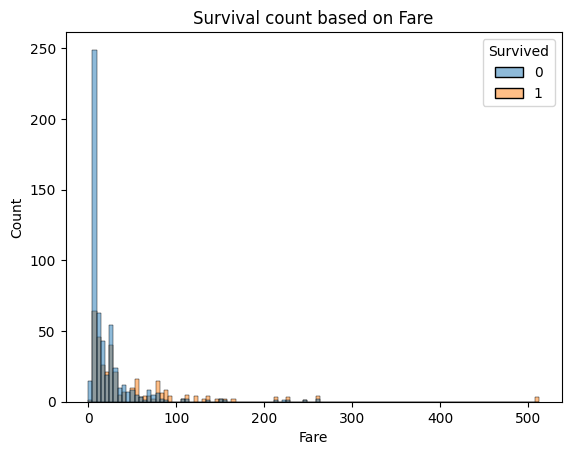

In [ ]:
sns.histplot(x='Fare', hue='Survived', data=df)
plt.title('Survival count based on Fare')
plt.show()

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: ignored

In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

In [ ]:
y_pred = knn_classifier.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
classification_report(y_test, y_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
best_k = 0
best_accuracy = 0
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k = {k}: {accuracy}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")

In [ ]:
# neighbors=2

knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
accuracy

## MultinomialNB Method

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7262569832402235

## BernoulliNB Method

In [ ]:
# Loop

from sklearn.naive_bayes import BernoulliNB

prior1 = [x/100 for x in range(100,200,5)]
prior2 = [x/100 for x in range(0,100,5)]
best_accuracy

best_val1 = None
best_val2 = None

for val2 in prior2:
  for val1 in prior1:
    clf = BernoulliNB(class_prior=[val1,val2])
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = acc
        best_val1 = val1
        best_val2 = val2

print(f"Best accuracy: {best_accuracy}")
print(f"Best val1: {best_val1}")
print(f"Best val2: {best_val2}")

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:596: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = np.log(class_prior)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:596: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = np.log(class_prior)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:596: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = np.log(class_prior)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:596: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = np.log(class_prior)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:596: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = np.log(class_prior)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:596: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = np.log(class_prior)
/usr/local/lib/p

Best accuracy: 0.8379888268156425
Best val1: None
Best val2: None


In [ ]:
prior1 = [x/100 for x in range(60,150,5)]
prior2 = [x/100 for x in range(60,150,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[val1, val2])
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 0.7877094972067039
Best val1: 0.6
Best val2: 0.6


In [ ]:
prior1 = [x/100 for x in range(100,200,5)]
prior2 = [x/100 for x in range(0,100,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[0.7, 0.6],alpha = val1,binarize = val2)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 0.7932960893854749
Best val1: 1.0
Best val2: 0.85


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

clf1 = MultinomialNB()
clf2 = BernoulliNB()

In [ ]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

BernoulliNB()

In [ ]:
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)

In [ ]:
cm1 = confusion_matrix(y_test,pred1)
cr1 = classification_report(y_test,pred1)

cm2 = confusion_matrix(y_test,pred2)
cr2 = classification_report(y_test,pred2)

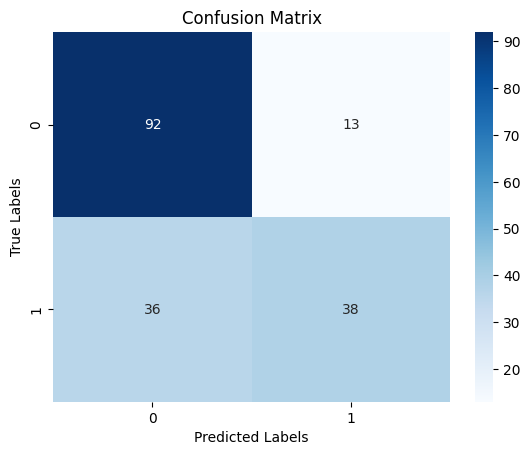

In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

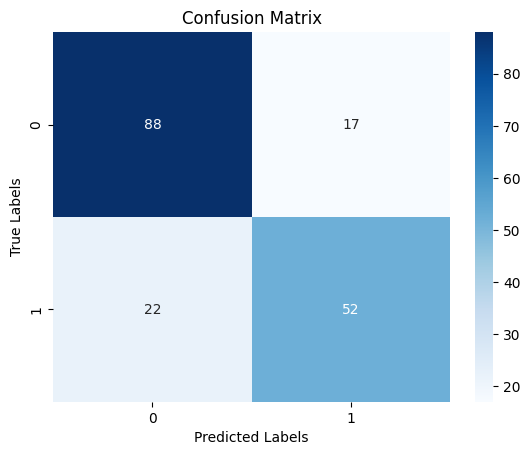

In [ ]:
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr1)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.51      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179



In [ ]:
print(cr2)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
clf3 = MultinomialNB(class_prior = [1,1.2])
clf4 = BernoulliNB(class_prior = [1,1.2])

In [ ]:
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)

pred3 = clf3.predict(X_test)
pred4 = clf4.predict(X_test)

cm3 = confusion_matrix(y_test,pred3)
cr3 = classification_report(y_test,pred3)

cm4 = confusion_matrix(y_test,pred4)
cr4 = classification_report(y_test,pred4)

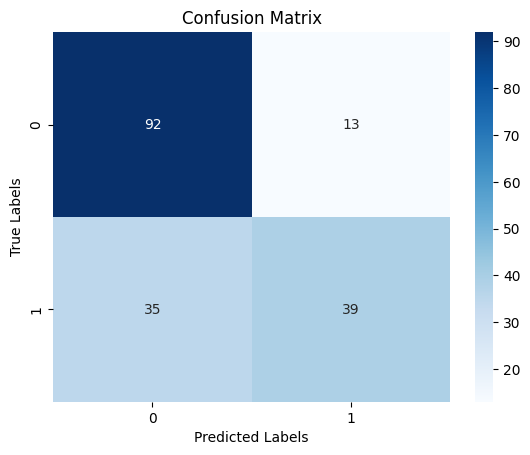

In [ ]:
sns.heatmap(cm3, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

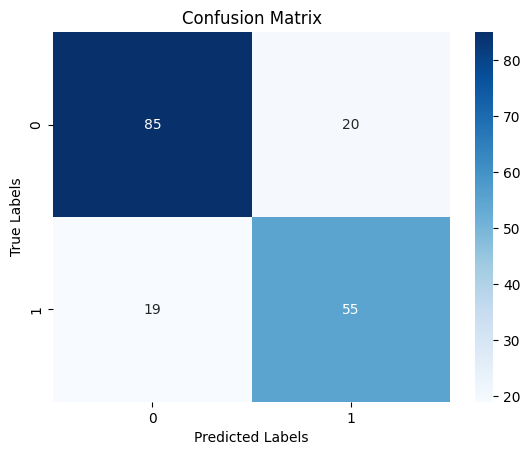

In [ ]:
sns.heatmap(cm4, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr3)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.53      0.62        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.73      0.73      0.72       179



In [ ]:
print(cr4)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
# loop

prior1 = [x/100 for x in range(60,150,5)]
prior2 = [x/100 for x in range(60,150,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[val1, val2])
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 0.7877094972067039
Best val1: 0.6
Best val2: 0.6


In [ ]:
prior1 = [x/100 for x in range(100,200,5)]
prior2 = [x/100 for x in range(0,100,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[0.7, 0.6],alpha = val1,binarize = val2)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 0.7932960893854749
Best val1: 1.0
Best val2: 0.85


In [ ]:
clf = BernoulliNB(class_prior=[0.7, 0.6],alpha = 1,binarize = 0.85)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

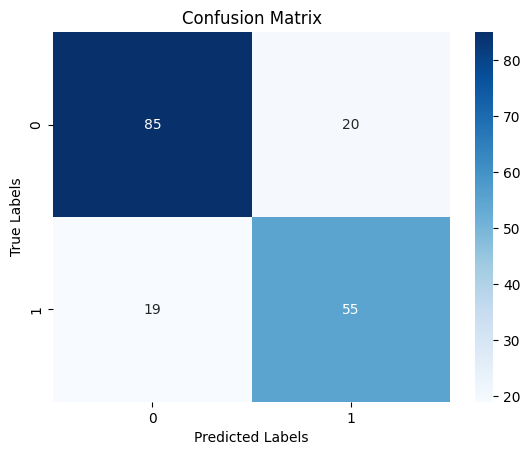

In [ ]:
sns.heatmap(cm4, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



# **SVM Model**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2'],
    'random_state' : [x for x in range(1,100)]
}

In [ ]:
grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

NameError: ignored

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop

opt_list = [Adam(learning_rate=0.0001),Adam(learning_rate=0.0002),
            Adam(learning_rate=0.0003),Adam(learning_rate=0.0004)]

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=7))
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier)


parameters = {'optimizer': opt_list}
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)

grid_search = grid_search.fit(x_train, y_train, verbose=1)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

<ipython-input-31-f2359c43d44e>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=build_classifier)


ValueError: ignored